In [453]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

## split into training and testing data 

In [454]:
df   = pd.read_csv('merged_DateFrames_full.csv', low_memory=False)

In [455]:
df = df.drop(['Greyhound Name'] ,axis=1)

In [456]:
df = df.drop(['Active'] ,axis=1)

In [457]:
df = df.drop(['Colour'] ,axis=1)

In [458]:
df = df.drop(['Sex'] ,axis=1)

In [459]:
df

,Earmark,Whelp Date,Status,NoticeSentBy
0,VLILX,11/06/2020,NEW,10/02/2022
1,VLILX,11/06/2020,NEW,11/02/2022
2,VLILX,11/06/2020,NEW,11/02/2022
3,VLILX,11/06/2020,NEW,12/02/2022
4,VLILX,11/06/2020,NEW,13/02/2022
...,...,...,...,...
967545,ZYHJP,02/05/2023,RAC,01/01/2023
967546,ZYTEB,02/05/2023,RAC,01/01/2023
967547,ZYKRR,03/05/2023,RAC,01/01/2023
967548,ZYHKP,03/05/2023,RAC,01/01/2023


In [460]:
df['NoticeSentBy'] = pd.to_datetime(df['NoticeSentBy'], format='%d/%m/%Y')

In [461]:
# Define the proportion of data for training (e.g., 80%)
train_proportion = 0.8

In [462]:
# Calculate the number of rows for training and testing
num_rows = len(df)
num_train = int(num_rows * train_proportion)
num_test = num_rows - num_train

In [463]:
# Randomly sample rows for training
train_indices = df.sample(n=num_train, random_state=42).index
train_df = df.loc[train_indices]

In [464]:
train_df

,Earmark,Whelp Date,Status,NoticeSentBy
356026,VXKVT,22/02/2020,RAC,2022-02-23
844829,TLLLZ,20/03/2018,RAC,2022-05-08
423,VDHIJ,09/10/2020,NEW,2022-04-20
81016,UBQUN,03/10/2019,NEW,2022-02-27
670253,URUBZ,16/09/2020,NEW,2022-06-21
...,...,...,...,...
387961,UXEXE,07/09/2019,NEW,2022-02-07
222170,XYQYA,15/03/2021,NEW,2022-06-14
384799,XBRES,24/07/2021,RAC,2022-02-14
566350,XDITJ,13/12/2020,RAC,2022-03-10


In [465]:
# Use the remaining rows for testing
test_df = df.drop(train_indices)

In [466]:
test_df

,Earmark,Whelp Date,Status,NoticeSentBy
3,VLILX,11/06/2020,NEW,2022-02-12
5,VLILX,11/06/2020,NEW,2022-02-14
8,VLILX,11/06/2020,NEW,2022-02-17
13,VLILX,11/06/2020,NEW,2022-02-23
15,VLILX,11/06/2020,NEW,2022-02-25
...,...,...,...,...
967529,ZLAUU,18/04/2023,RAC,2023-01-01
967536,ZYHNL,03/05/2023,RAC,2023-01-01
967543,ZYHML,02/05/2023,RAC,2023-01-01
967544,ZYZJH,03/05/2023,RAC,2023-01-01


In [467]:
# Write training and testing DataFrames to CSV files
train_df.to_csv('training_data.csv', index=False)
test_df.to_csv('testing_data.csv', index=False)

In [468]:
training_data= pd.read_csv('training_data.csv', low_memory=False)

In [469]:
training_data.shape

(774040, 4)

In [470]:
training_data["Status"].unique()

array(['RAC', 'NEW', 'DIE', 'RET', 'EUT'], dtype=object)

In [471]:
# Convert "Status" column to float and encode categorical labels
training_data["Status"] = training_data["Status"].map({"EUT": 0, "RAC": 1,"DIE":2,"REG":3,"RET":4,"NEW":5}).astype(float)


In [472]:
training_data.head()

,Earmark,Whelp Date,Status,NoticeSentBy
0,VXKVT,22/02/2020,1.0,2022-02-23
1,TLLLZ,20/03/2018,1.0,2022-05-08
2,VDHIJ,09/10/2020,5.0,2022-04-20
3,UBQUN,03/10/2019,5.0,2022-02-27
4,URUBZ,16/09/2020,5.0,2022-06-21


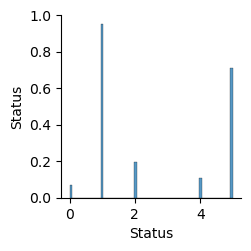

In [473]:
#this data should corrolated.
sns.pairplot(training_data)

In [474]:
training_data = training_data.iloc[:,2].values

In [475]:
training_data

array([1., 1., 5., ..., 1., 1., 5.])

In [476]:
type(training_data)

numpy.ndarray

In [477]:
min(training_data)
max(training_data)

5.0

In [478]:
# scale the data , with a min max scaler
from sklearn.preprocessing import MinMaxScaler

In [479]:
scaler = MinMaxScaler()

In [480]:
training_data.shape

(774040,)

In [481]:
#the data is now only 1 dimissional data , needs to be 2 dimissional data
#reshape the data
training_data = scaler.fit_transform(training_data.reshape(-1,1))

In [482]:
training_data.shape

(774040, 1)

In [483]:
training_data

array([[0.2],
       [0.2],
       [1. ],
       ...,
       [0.2],
       [0.2],
       [1. ]])

In [484]:
#create 2 list, taking 40 days data to predict 1 day.
x_training_data = [] # 40 days
y_training_data = [] # 1 days

In [485]:
for i in range(40,len(training_data)):
    x_training_data.append(training_data[i-40:i,0])
    y_training_data.append(training_data[i,0])

In [486]:
#currently x_training and y_training are a list and need to be a numpy array
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [487]:
# the last step is to reshape our x_training_data(independant variable) into 3 dimensional and the 
# y_training_data(dependant variable) into 2 dimensional
x_training_data = np.reshape(x_training_data,(x_training_data.shape[0],
                             x_training_data.shape[1],
                              1))

In [488]:
#tensors requires 3 dimensions
x_training_data.shape

(774000, 40, 1)

Part2 Tensorflow

In [489]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [490]:
#build Recurrent Neural Network(RNN)
rnn = Sequential()

In [491]:
#layer 1
rnn.add(LSTM(units=45,return_sequences=True,input_shape=(x_training_data.shape[1],1)))
#to help overfitting drop rate of 20%
rnn.add(Dropout(0.4))

In [492]:
#layer 2
rnn.add(LSTM(units=45,return_sequences=True))
#to help overfitting drop rate of 20%
rnn.add(Dropout(0.4))

In [493]:
#Layer 3
rnn.add(LSTM(units=45))
#to help overfitting drop rate of 20%
rnn.add(Dropout(0.4))

In [494]:
#output layer
rnn.add(Dense(units=1))

In [495]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [496]:
#frame this
rnn.fit(x_training_data,y_training_data, epochs=10, batch_size=64)

Epoch 1/10
12094/12094 [==============================] - 1031s 84ms/step - loss: 0.1442
Epoch 2/10
12094/12094 [==============================] - 1029s 85ms/step - loss: 0.1432
Epoch 3/10
12094/12094 [==============================] - 1066s 88ms/step - loss: 0.1432
Epoch 4/10
12094/12094 [==============================] - 1079s 89ms/step - loss: 0.1432
Epoch 5/10
12094/12094 [==============================] - 1081s 89ms/step - loss: 0.1432
Epoch 6/10
12094/12094 [==============================] - 1084s 90ms/step - loss: 0.1432
Epoch 7/10
12094/12094 [==============================] - 908s 75ms/step - loss: 0.1432
Epoch 8/10
12094/12094 [==============================] - 779s 64ms/step - loss: 0.1432
Epoch 9/10
12094/12094 [==============================] - 772s 64ms/step - loss: 0.1432
Epoch 10/10
12094/12094 [==============================] - 779s 64ms/step - loss: 0.1432


In [ ]:
#frame this
#rnn.fit(x_training_data,y_training_data, epochs=5, batch_size=64)

### Part 3 make predictions

In [497]:
#Import the test data set and transform it into a NumPy array
test_data = pd.read_csv('testing_data.csv')
test_data

,Earmark,Whelp Date,Status,NoticeSentBy
0,VLILX,11/06/2020,NEW,2022-02-12
1,VLILX,11/06/2020,NEW,2022-02-14
2,VLILX,11/06/2020,NEW,2022-02-17
3,VLILX,11/06/2020,NEW,2022-02-23
4,VLILX,11/06/2020,NEW,2022-02-25
...,...,...,...,...
193505,ZLAUU,18/04/2023,RAC,2023-01-01
193506,ZYHNL,03/05/2023,RAC,2023-01-01
193507,ZYHML,02/05/2023,RAC,2023-01-01
193508,ZYZJH,03/05/2023,RAC,2023-01-01


In [498]:
training_data

array([[0.2],
       [0.2],
       [1. ],
       ...,
       [0.2],
       [0.2],
       [1. ]])

In [499]:
#test_data = test_data.iloc[:,7].values
#Make sure the test data's shape makes sense
print(test_data.shape)
#Plot the test data
#plt.plot(test_data)

(193510, 4)


In [500]:
#Create unscaled training data and test data objects
unscaled_training_data = pd.read_csv('training_data.csv')
unscaled_test_data = pd.read_csv('testing_data.csv')
# Convert "Status" column to float and encode categorical labels

In [501]:
unscaled_training_data

,Earmark,Whelp Date,Status,NoticeSentBy
0,VXKVT,22/02/2020,RAC,2022-02-23
1,TLLLZ,20/03/2018,RAC,2022-05-08
2,VDHIJ,09/10/2020,NEW,2022-04-20
3,UBQUN,03/10/2019,NEW,2022-02-27
4,URUBZ,16/09/2020,NEW,2022-06-21
...,...,...,...,...
774035,UXEXE,07/09/2019,NEW,2022-02-07
774036,XYQYA,15/03/2021,NEW,2022-06-14
774037,XBRES,24/07/2021,RAC,2022-02-14
774038,XDITJ,13/12/2020,RAC,2022-03-10


In [502]:
unscaled_test_data

,Earmark,Whelp Date,Status,NoticeSentBy
0,VLILX,11/06/2020,NEW,2022-02-12
1,VLILX,11/06/2020,NEW,2022-02-14
2,VLILX,11/06/2020,NEW,2022-02-17
3,VLILX,11/06/2020,NEW,2022-02-23
4,VLILX,11/06/2020,NEW,2022-02-25
...,...,...,...,...
193505,ZLAUU,18/04/2023,RAC,2023-01-01
193506,ZYHNL,03/05/2023,RAC,2023-01-01
193507,ZYHML,02/05/2023,RAC,2023-01-01
193508,ZYZJH,03/05/2023,RAC,2023-01-01


In [503]:
unscaled_test_data

,Earmark,Whelp Date,Status,NoticeSentBy
0,VLILX,11/06/2020,NEW,2022-02-12
1,VLILX,11/06/2020,NEW,2022-02-14
2,VLILX,11/06/2020,NEW,2022-02-17
3,VLILX,11/06/2020,NEW,2022-02-23
4,VLILX,11/06/2020,NEW,2022-02-25
...,...,...,...,...
193505,ZLAUU,18/04/2023,RAC,2023-01-01
193506,ZYHNL,03/05/2023,RAC,2023-01-01
193507,ZYHML,02/05/2023,RAC,2023-01-01
193508,ZYZJH,03/05/2023,RAC,2023-01-01


In [504]:
unscaled_training_data["Status"] = unscaled_training_data["Status"].map({"EUT": 0, "RAC": 1,"DIE":2,"REG":3,"RET":4,"NEW":5}).astype(float)

unscaled_test_data["Status"] = unscaled_test_data["Status"].map({"EUT": 0, "RAC": 1,"DIE":2,"REG":3,"RET":4,"NEW":5}).astype(float)


In [505]:
unscaled_training_data

,Earmark,Whelp Date,Status,NoticeSentBy
0,VXKVT,22/02/2020,1.0,2022-02-23
1,TLLLZ,20/03/2018,1.0,2022-05-08
2,VDHIJ,09/10/2020,5.0,2022-04-20
3,UBQUN,03/10/2019,5.0,2022-02-27
4,URUBZ,16/09/2020,5.0,2022-06-21
...,...,...,...,...
774035,UXEXE,07/09/2019,5.0,2022-02-07
774036,XYQYA,15/03/2021,5.0,2022-06-14
774037,XBRES,24/07/2021,1.0,2022-02-14
774038,XDITJ,13/12/2020,1.0,2022-03-10


In [506]:
all_data=pd.concat((unscaled_training_data['Status'],
unscaled_test_data['Status']), axis = 0)

In [507]:
#Create our x_test_data object, which has each January day + the 40 prior days
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values
#
x_test_data = np.reshape(x_test_data, (-1, 1))
#x_test_data = np.reshape(test_data, (-1, 1))

In [508]:
x_test_data

array([[1.],
       [1.],
       [5.],
       ...,
       [1.],
       [1.],
       [1.]])

In [509]:
#Scale the test data
x_test_data = scaler.transform(x_test_data)

In [510]:
#Grouping our test data
final_x_test_data = []
for i in range(40, len(x_test_data)):
    final_x_test_data.append(x_test_data[i-40:i, 0])
final_x_test_data = np.array(final_x_test_data) 

In [511]:
#Reshaping the NumPy array to meet TensorFlow standards
final_x_test_data=np.reshape(final_x_test_data,
(final_x_test_data.shape[0], final_x_test_data.shape[1], 1))

In [512]:
#Generating our predicted values
predictions = rnn.predict(final_x_test_data)

6048/6048 [==============================] - 114s 19ms/step


In [513]:
import numpy as np

In [514]:
from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(test_sample, pred_sample)

In [515]:
predicted_values = rnn.predict(final_x_test_data)

6048/6048 [==============================] - 113s 19ms/step


In [516]:
predicted_values.shape

(193510, 1)

In [517]:
# the last step is to reshape our x_training_data(independant variable) into 3 dimensional and the 
# y_training_data(dependant variable) into 2 dimensional
predicted_values = np.reshape(predicted_values,(predicted_values.shape[0],
                             predicted_values.shape[1],
                              1))

In [518]:
final_x_test_data.shape

(193510, 40, 1)

In [519]:
final_x_test_data_reshape = final_x_test_data.reshape(-1,)

In [520]:
predicted_values_reshape = predicted_values.reshape(-1,)

In [521]:
final_x_test_data_reshape

array([0.2, 0.2, 1. , ..., 0.2, 0.2, 0.2])

In [522]:
predicted_values_reshape.shape

(193510,)

In [540]:
sample_size = 100  # Adjust this to your desired size

# Get random indices for sampling
rng = np.random.default_rng(seed=42)  # Create a random number generator with a seed for reproducibility


In [541]:
train_indices = rng.choice(len(predicted_values_reshape), size=sample_size, replace=False)
test_indices = rng.choice(len(final_x_test_data_reshape), size=sample_size, replace=False)

In [542]:
# Randomly sample from the training dataset
pred_sample = predicted_values_reshape[train_indices]

# Randomly sample from the test dataset
test_sample = final_x_test_data_reshape[test_indices]

In [543]:
mse = mean_squared_error(test_sample, pred_sample)


In [544]:
mse

0.14601628405503025

Text(0.5, 1.0, 'sample test data')

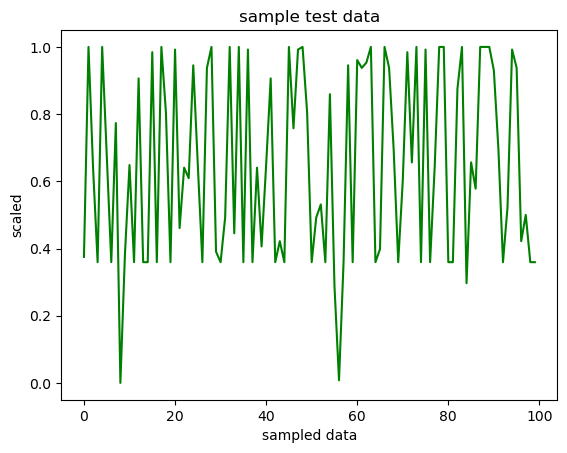

In [565]:
#Plotting our predicted values
plt.clf() #This clears the old plot from our canvas
plt.plot(pred, color = 'Green', label = "Predictions")
plt.xlabel('sampled data')
plt.ylabel('scaled')
plt.title('sample test data')

In [557]:
pred = scaler.fit_transform(pred_sample.reshape(-1,1))

Text(0.5, 1.0, 'sample test data')

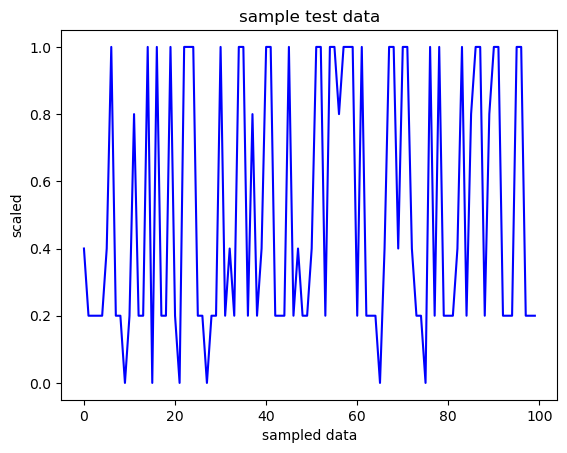

In [564]:
#Plotting our predicted values
plt.clf() #This clears the old plot from our canvas
plt.plot(test_sample, color = 'Blue', label = "test data")
plt.xlabel('sampled data')
plt.ylabel('scaled')
plt.title('sample test data')

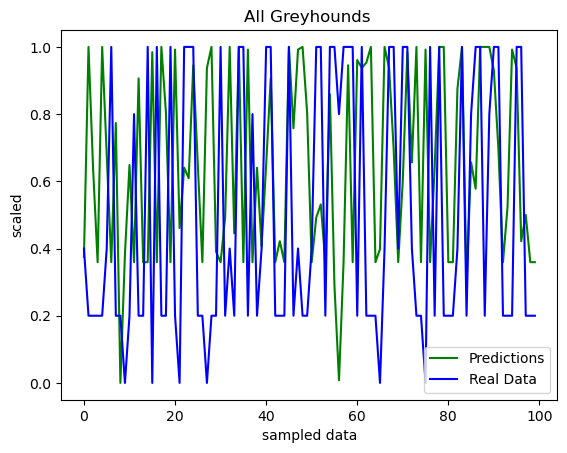

In [563]:
#Plotting the predicted values against Facebook's actual stock price
plt.plot(pred, color = 'Green', label = "Predictions")
plt.plot(test_sample, color = 'blue', label = "Real Data")
plt.xlabel('sampled data')
plt.ylabel('scaled')
plt.title('All Greyhounds ')
plt.legend()